In [2]:
import csv
import json
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train_file = '/home/juliame/social-movements/annotated_data/data_splits_06-21-2023/train_full.tsv'
test_file = '/home/juliame/social-movements/annotated_data/data_splits_06-21-2023/test_full.tsv'

In [4]:
train_df = pd.read_csv(train_file,sep='\t')
test_df = pd.read_csv(test_file,sep='\t')

In [5]:
df = pd.concat([train_df,test_df])

In [6]:
df['text'].nunique()   # There's only one tweet that's an exact match

5999

In [17]:
df.groupby(by='text').agg('count').sort_values(by='id_str',ascending=False).reset_index()['text'][0]

'.@realDonaldTrump Syrian refugees deserve safe shelter. The US can do more for the most vulnerable. Be a #GlobalCitizen #RefugeesWelcome'

In [19]:
counts = []
task_cols = sorted([col for col in df.columns if col.startswith('Task') and not col.startswith('Task2')])
for task_col in task_cols:
    entry = [task_col,df[task_col].sum(),df[task_col].mean()]
    counts.append(entry)
df_counts = pd.DataFrame(counts,columns=['Task','Count','Proportion'])#.sort_values(by='Count',ascending=False)

In [20]:
df_counts.sort_values(by='Task').round(decimals=3)

,Task,Count,Proportion
0,Task1:relevance,4859,0.810
1,Task3:blame,1751,0.292
2,Task3:diagnostic,2870,0.478
3,Task3:identify,2655,0.442
4,Task4:counter,348,0.058
5,Task4:prognostic,2143,0.357
6,Task4:solidarity,737,0.123
7,Task4:solution,820,0.137
8,Task4:tactics,571,0.095
9,Task5:motivational,665,0.111


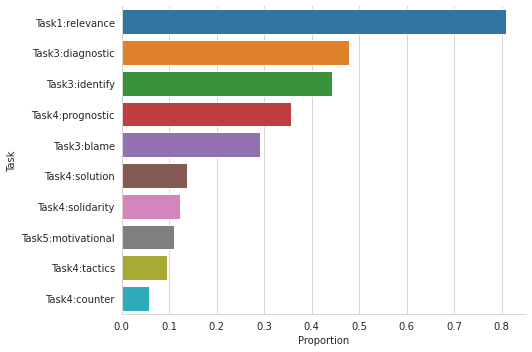

In [33]:
sns.set_style('whitegrid')
sns.catplot(x='Proportion',y='Task',data=df_counts,kind='bar',aspect=1.5)

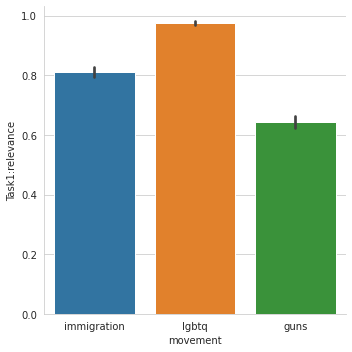

In [36]:
sns.catplot(x='movement',y='Task1:relevance',data=df,kind='bar')

In [45]:
df_long = pd.melt(df,id_vars=['id_str','text','movement'])
df_long_no_stance = df_long[df_long['variable'].isin(['Task2:stance','Task2:stance-explicit'])==False]

Text(43.27197916666668, 0.5, 'Task (excluding stance)')

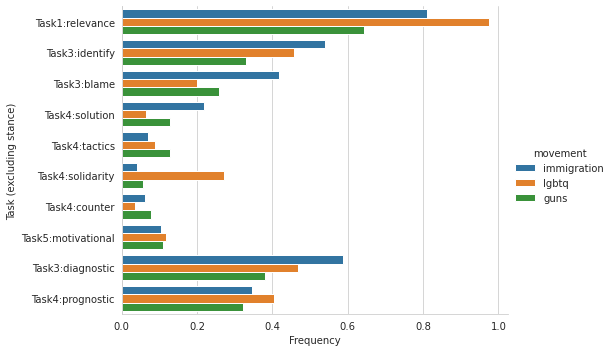

In [96]:
sns.catplot(y='variable',x='value',hue='movement',data=df_long_no_stance,kind='bar',aspect=1.5,ci=False)
plt.xlabel('Frequency')
plt.ylabel('Task (excluding stance)')

In [80]:
df_stance = df[df['Task1:relevance']==1][['id_str','text','movement','Task2:stance']]

In [81]:
df_stance['stance'] = df_stance['Task2:stance'].replace({0:'anti',1:'neutral',2:'pro'})


In [82]:
df_stance_count = df_stance[['id_str','stance','movement']].groupby(by=['movement','stance']).agg('count').reset_index()

In [83]:
df_stance_count.columns = ['movement','stance','count']

In [84]:
df_stance_count = df_stance_count.set_index('movement')
df_stance_count = df_stance_count.pivot(columns='stance')

Text(0.5, 1.0, 'Stance count by movement (out of relevant tweets only)')

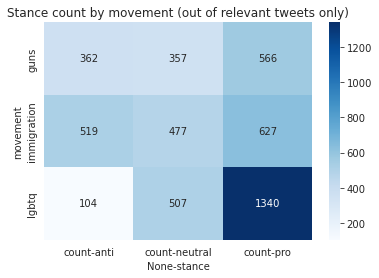

In [88]:
sns.heatmap(df_stance_count,annot=True,fmt='.0f',cmap='Blues')
plt.title('Stance count by movement (out of relevant tweets only)')

In [90]:
df_stance_count

count              
stance       anti neutral   pro
movement                       
guns          362     357   566
immigration   519     477   627
lgbtq         104     507  1340

<AxesSubplot:xlabel='None-movement', ylabel='variable'>

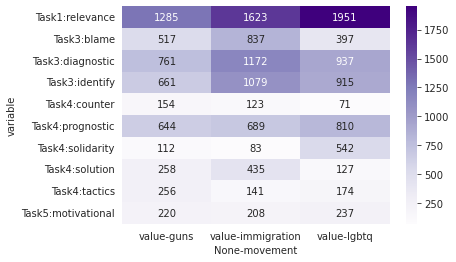

In [107]:
df_counts_no_stance = df_long_no_stance.groupby(by=['movement','variable']).agg('sum').reset_index()
df_counts_no_stance = df_counts_no_stance[['movement','variable','value']]
df_counts_no_stance = df_counts_no_stance.set_index('variable')
sns.heatmap(df_counts_no_stance.pivot(columns='movement'),annot=True,fmt='.0f',cmap='Purples')